<a href="https://colab.research.google.com/github/Cliff12001/IMSE-441/blob/main/IMSE_441_Final_Project(_CR_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
%pip install pingouin
import pingouin as pg

1.)

In [3]:
url = "https://raw.githubusercontent.com/KhmAsif/IMSE441/main/ds_salaries.csv"
df = pd.read_csv(url)
df.head()

,year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size,age
0,2023,SE,FT,Principal Data Scientist,80000,EUR,ES,100,USA,L,44
1,2023,MI,CT,ML Engineer,30000,USD,US,100,USA,S,51
2,2023,MI,CT,ML Engineer,25500,USD,US,100,USA,S,27
3,2023,SE,FT,Data Scientist,175000,USD,CA,100,USA,M,54
4,2023,SE,FT,Data Scientist,120000,USD,CA,100,USA,M,48


In [57]:
df.dtypes

year                 int64
experience_level    object
employment_type     object
job_title           object
salary               int64
company_location    object
company_size        object
age                  int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                115 non-null    int64 
 1   experience_level    115 non-null    object
 2   employment_type     115 non-null    object
 3   job_title           115 non-null    object
 4   salary              115 non-null    int64 
 5   salary_currency     115 non-null    object
 6   employee_residence  115 non-null    object
 7   remote_ratio        115 non-null    int64 
 8   company_location    115 non-null    object
 9   company_size        115 non-null    object
 10  age                 115 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 10.0+ KB


In [5]:
df.isnull().sum() 

year                  0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
age                   0
dtype: int64

In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                115 non-null    int64 
 1   experience_level    115 non-null    object
 2   employment_type     115 non-null    object
 3   job_title           115 non-null    object
 4   salary              115 non-null    int64 
 5   salary_currency     115 non-null    object
 6   employee_residence  115 non-null    object
 7   remote_ratio        115 non-null    int64 
 8   company_location    115 non-null    object
 9   company_size        115 non-null    object
 10  age                 115 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 10.0+ KB


In [74]:
columns = df.applymap(np.isreal).all()

In [75]:
print((columns).value_counts())

False    5
True     3
dtype: int64


2.)

In [31]:
Unique_Values = df.nunique()
print(Unique_Values)

year                 2
experience_level     4
employment_type      4
job_title           15
salary              97
company_location     2
company_size         3
age                 35
dtype: int64


For the year column there are two unique values because there is two different years 2022 and 2023, therefor there are two unique values. For the employment type, there are four different types of employment and therefor there are 4 unique values.

3.)

In [8]:
df = df.drop(['salary_currency','employee_residence','remote_ratio'],axis = 1)
df.head()

,year,experience_level,employment_type,job_title,salary,company_location,company_size,age
0,2023,SE,FT,Principal Data Scientist,80000,USA,L,44
1,2023,MI,CT,ML Engineer,30000,USA,S,51
2,2023,MI,CT,ML Engineer,25500,USA,S,27
3,2023,SE,FT,Data Scientist,175000,USA,M,54
4,2023,SE,FT,Data Scientist,120000,USA,M,48


In [9]:
df.groupby('job_title').size()

job_title
Analytics Engineer                 6
Applied Scientist                  8
Business Intelligence Engineer     4
Computer Vision Engineer           4
Data Analyst                      10
Data Architect                     2
Data Engineer                     30
Data Modeler                       2
Data Scientist                    29
Data Strategist                    2
ML Engineer                        2
Machine Learning Engineer          8
Principal Data Scientist           1
Research Engineer                  6
Research Scientist                 1
dtype: int64

There are 6 Analytics Engineers

In [18]:
AE=(df[df['job_title']=='Analytics Engineer']['salary'])
AE

23     230000
24     143200
103    152500
104    116450
113    289800
114    214000
Name: salary, dtype: int64

In [19]:
mean = np.mean(AE)
print("Mean:", mean)

Mean: 190991.66666666666


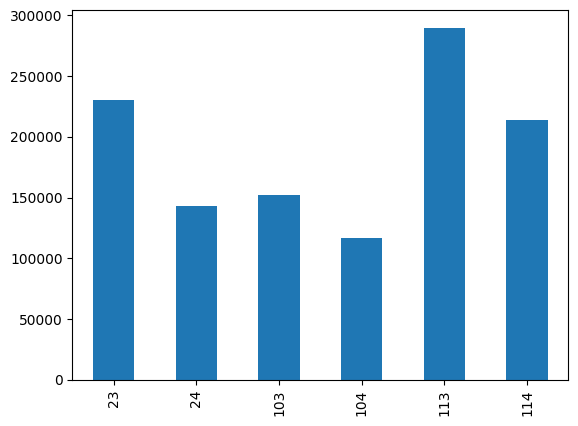

In [78]:
(df[df['job_title']=='Analytics Engineer']['salary']).plot(kind='bar');

4.)

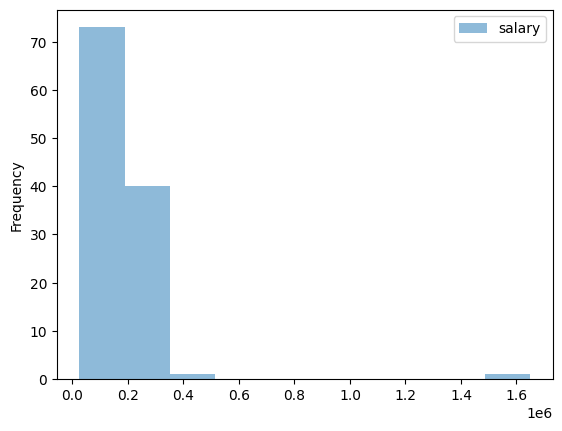

In [149]:
df['salary'].plot(kind = 'hist', alpha = 0.5)
plt.legend(['salary'])

The salary range for most people is around the 100,000 dollar range.

5.)

In [36]:
g= df.groupby('job_title').size()
g

job_title
Analytics Engineer                 6
Applied Scientist                  8
Business Intelligence Engineer     4
Computer Vision Engineer           4
Data Analyst                      10
Data Architect                     2
Data Engineer                     30
Data Modeler                       2
Data Scientist                    29
Data Strategist                    2
ML Engineer                        2
Machine Learning Engineer          8
Principal Data Scientist           1
Research Engineer                  6
Research Scientist                 1
dtype: int64

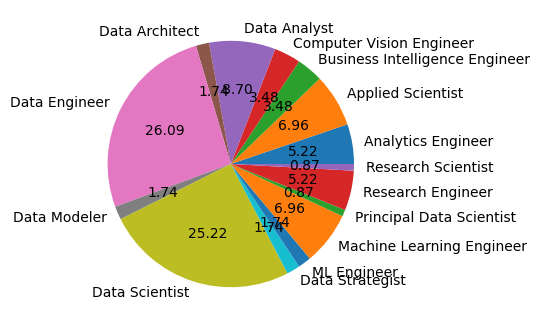

In [38]:
g.plot(kind='pie', labels=['Analytics Engineer','Applied Scientist','Business Intelligence Engineer','Computer Vision Engineer','Data Analyst','Data Architect','Data Engineer','Data Modeler','Data Scientist','Data Strategist','ML Engineer','Machine Learning Engineer','Principal Data Scientist','Research Engineer','Research Scientist'], 
       autopct='%.2f', fontsize=10, figsize=(4, 4));

the job title that has the most amount of people in it is the Data Engineering.

6.)

In [153]:
filtered_df = df[df['salary'] > 400000]
count = len(filtered_df)
print(first_two_rows)

    year experience_level employment_type                  job_title   salary  \
39  2022               MI              FL  Machine Learning Engineer  1650000   
78  2023               MI              FL             Data Scientist   510000   

   company_location company_size  age  
39              USA            L   57  
78              USA            L   32  


7.)

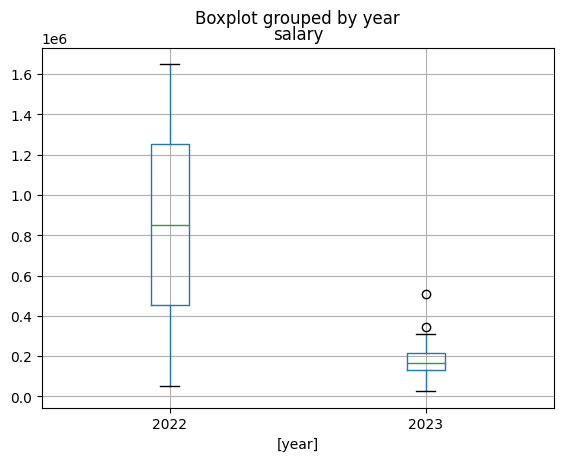

In [121]:
df.boxplot(column=['salary'], by=['year']);

In [144]:
salary=(df[df['year']=='2023']['salary'])
salary

Series([], Name: salary, dtype: int64)

In [146]:
mean = np.mean(salary)
print("Mean:", mean)

Mean: nan


In [143]:
df['salary'].median()

166000.0

8.)

a.)

In [40]:
ex= df.groupby('experience_level').size()
ex

experience_level
EN     8
EX     2
MI    11
SE    94
dtype: int64

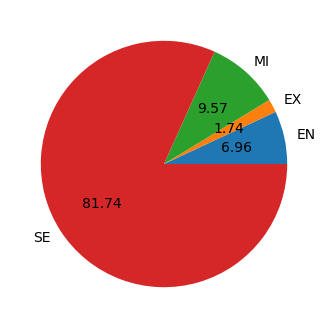

In [41]:
ex.plot(kind='pie', labels=['EN','EX','MI','SE'], 
       autopct='%.2f', fontsize=10, figsize=(4, 4));

1.74 percent of people have executive level experience

b.)

In [42]:
L= df.groupby('company_size').size()
L

company_size
L    15
M    97
S     3
dtype: int64

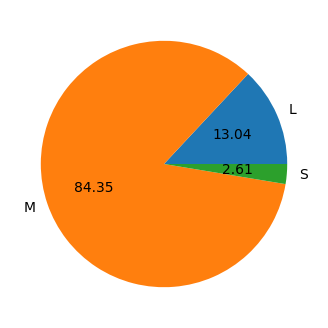

In [44]:
L.plot(kind='pie', labels=['L','M','S'], 
       autopct='%.2f', fontsize=10, figsize=(4, 4));

13.04 percent of people are employed at a Large company.

c.)

In [137]:
c= df.groupby(['company_location','employment_type',]).size().unstack()
c

employment_type,CT,FL,FT,PT
company_location,,,,
EUR,2,3,26,19
USA,7,18,37,3


<Axes: xlabel='company_location'>

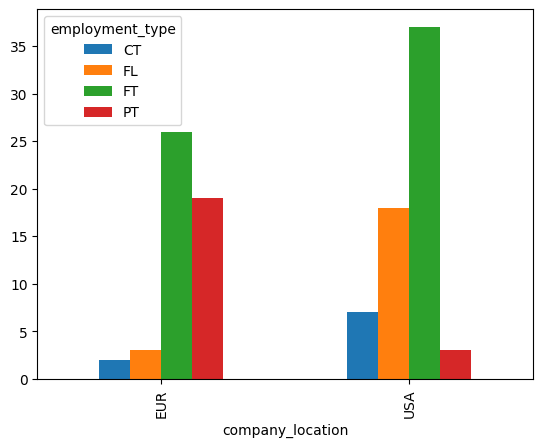

In [142]:
c.plot(kind = 'bar')

9.)

a.)

In [130]:
d = df.groupby(['employment_type','company_location',]).size().unstack()
d

company_location,EUR,USA
employment_type,,
CT,2,7
FL,3,18
FT,26,37
PT,19,3


<Axes: xlabel='employment_type'>

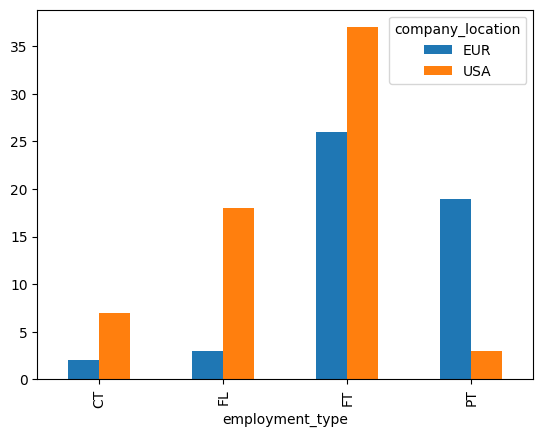

In [131]:
d.plot(kind= 'bar')

b.)

In [132]:
s = df.groupby(['company_size','company_location',]).size().unstack()
s

company_location,EUR,USA
company_size,,
L,5,10
M,44,53
S,1,2


<Axes: xlabel='company_size'>

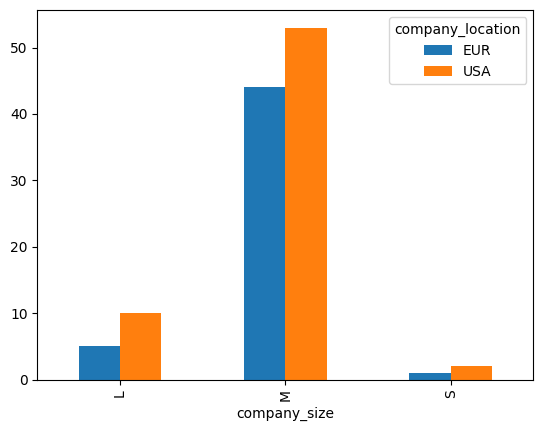

In [133]:
s.plot(kind= 'bar')

c.)

In [136]:
f= df.groupby(['employment_type','experience_level',]).size().unstack()
f

experience_level,EN,EX,MI,SE
employment_type,,,,
CT,2.0,NaN,3.0,4.0
FL,2.0,NaN,7.0,12.0
FT,NaN,2.0,1.0,60.0
PT,4.0,NaN,NaN,18.0


<Axes: xlabel='employment_type'>

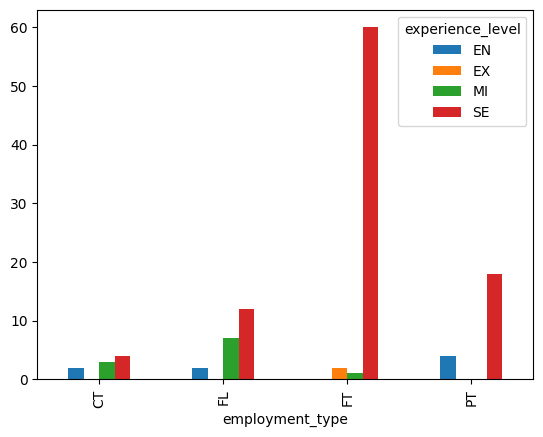

In [135]:
f.plot(kind= 'bar')

10.)

<Axes: ylabel='Frequency'>

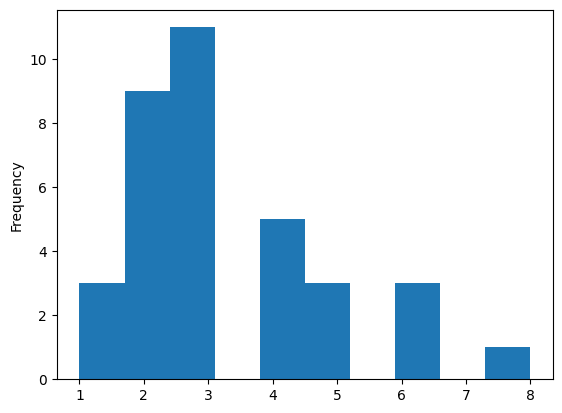

In [58]:
df.groupby('age').size().plot(kind='hist')

Text(0.5, 1.0, 'Age')

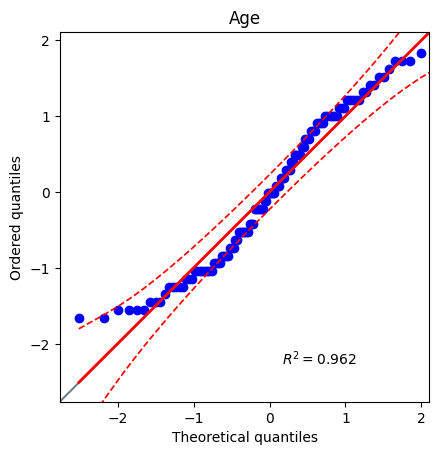

In [123]:
plt.show()            
pg.qqplot(df['age']).set_title('Age')

In [125]:
import scipy as scipy
from scipy import stats

In [128]:
stats.ttest_1samp(df['age'],30)

TtestResult(statistic=12.221906042968829, pvalue=1.8352675934333261e-22, df=114)

In [127]:
CI= stats.ttest_1samp(df['age'],30).confidence_interval(confidence_level=0.96)
CI

ConfidenceInterval(low=39.281757281509634, high=43.08346010979471)

With a pvalue of 1.83e^-22. we should reject the null hypothesis, due to the calculated pvalue being less than 0.05. Also the mean of 30 is not acceptable due to the low side of the confidence interval at 39.28.

11.)

In [85]:
x = df[['age']]
y= df['salary']
x

,age
0,44
1,51
2,27
3,54
4,48
...,...
110,42
111,51
112,39
113,36


In [88]:
model = lm.LinearRegression()
model.fit(x,y)

LinearRegression()

In [89]:
print('Coefficients: ', model.coef_)
print("y-intercept ", model.intercept_)

Coefficients:  [1540.13479365]
y-intercept  118586.24015009381


In [93]:
y_pred = model.predict(x)
y_pred

array([186352.17107081, 197133.11462638, 160169.87957872, 201753.51900734,
       192512.71024542, 174031.09272159, 210994.32776926, 200213.38421369,
       207914.05818195, 175571.22751524, 207914.05818195, 187892.30586447,
       187892.30586447, 163250.14916602, 169410.68834063, 207914.05818195,
       160169.87957872, 170950.82313429, 167870.55354698, 166330.41875333,
       190972.57545177, 200213.38421369, 158629.74478506, 163250.14916602,
       174031.09272159, 184812.03627716, 158629.74478506, 195592.97983273,
       203293.65380099, 166330.41875333, 194052.84503908, 163250.14916602,
       169410.68834063, 175571.22751524, 172490.95792794, 158629.74478506,
       181731.76668985, 186352.17107081, 181731.76668985, 206373.9233883 ,
       178651.49710255, 189432.44065812, 190972.57545177, 197133.11462638,
       195592.97983273, 180191.6318962 , 186352.17107081, 166330.41875333,
       178651.49710255, 157089.60999141, 172490.95792794, 164790.28395967,
       163250.14916602, 1

In [96]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

In [97]:
print("mean square error: ", mean_squared_error(y,y_pred))
print("variance or r-squared: ", explained_variance_score(y, y_pred))

mean square error:  23691545807.144165
variance or r-squared:  0.009464708573278524
